## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import kurtosis

%matplotlib inline
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
file_path = "bank-additional-full.csv"
data = pd.read_csv(file_path, sep=';')

In [3]:
numeric_data = data.select_dtypes(include=[np.number])
numeric_summary = numeric_data.describe()

print("\t\tСтатистична інформація по числовим зсінним\n")
print(numeric_summary)

		Статистична інформація по числовим зсінним

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std     

In [4]:
dataset_shape = data.shape
print("Розмірність датасету:", dataset_shape)

Розмірність датасету: (41188, 21)


**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [5]:
target_attribute = 'y'

label_encoder = LabelEncoder()
data['y_encoded'] = label_encoder.fit_transform(data[target_attribute])

bank_target = data['y_encoded']

print("Розмірність bank_target:", bank_target.shape)

Розмірність bank_target: (41188,)


## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [6]:
bank_client = data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]

for col in bank_client.columns:
    unique_values = bank_client[col].unique()
    print(f"Унікальні значення для '{col}': {unique_values} \n")

Унікальні значення для 'age': [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89] 

Унікальні значення для 'job': ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

Унікальні значення для 'marital': ['married' 'single' 'divorced' 'unknown'] 

Унікальні значення для 'education': ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

Унікальні значення для 'default': ['no' 'unknown' 'yes'] 

Унікальні значення для 'housing': ['no' 'yes' 'unknown'] 

Унікальні значення для 'loan': ['no' 'yes' 'unknown'] 



**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

In [7]:
max_age = data['age'].max()
min_age = data['age'].min()
print("Максимальний вік:", max_age)
print("Мінімальний вік:", min_age)

Максимальний вік: 98
Мінімальний вік: 17


In [9]:
nan_check = data['age'].isna().any()
print("Наявність NaN у стовпці 'age':", nan_check)

Наявність NaN у стовпці 'age': False


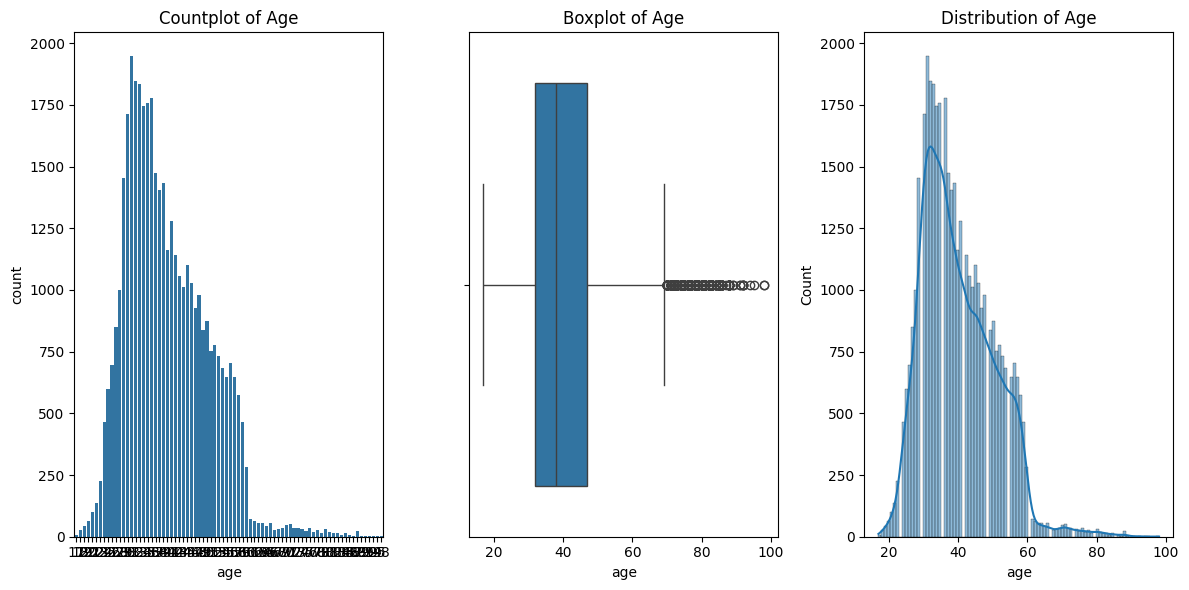

In [8]:
plt.figure(figsize=(12, 6))

# Countplot
plt.subplot(1, 3, 1)
sns.countplot(data=data, x='age')
plt.title('Countplot of Age')

# Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(data=data, x='age')
plt.title('Boxplot of Age')

# Distplot
plt.subplot(1, 3, 3)
sns.histplot(data=data, x='age', kde=True)
plt.title('Distribution of Age')

plt.tight_layout()
plt.show()

**Висновки з 1-4 завдання (детальні)**

1.   Завдання 1: 
      - було успішно завантажено вибірку bank-additional-full.csv та підключено необхідні бібліотеки.
      - Була виведена основна статистична інформація по числовим змінним датасету (розподіл значень, середнє значення, стандартне відхилення та квартилі для кожної числової змінної).
      - Розмірність датасету після завантаження була виведена як (41188, 21).

2.   Завдання 2: 
      - Було визначено, що цільовим атрибутом є "y", який вказує на те, чи підписав клієнт депозит (бінарна змінна: "yes" - 1 або "no" - 0).
      - Отриманну чисельну змінну ьуло збережено у bank_target, розмірність (41188,).
      
3.   Завдання 3: 
      - Основні атрибути, що характеризують клієнтів банку (age, job, marital, education, default, housing, loan).
      - Для кожного атрибута з атрибутів клієнтів банку, були перевірені дані на унікальні значення.

4.  Завдання 4:
      - Максимальне та мінімальне значення віку: 98-17.
      - У стовпці "age" немає пропущених значень (NaN).
      - Countplot of Age: Гістограма показує розподіл віку клієнтів банку. Більшість клієнтів зосереджені в діапазоні від ~20 до ~60 років.
      - Boxplot of Age: Коробкова діаграма віку демонструє медіану, квартилі та викиди. Більшість віку зосереджені у вузькому діапазоні, з деякими викидами на старші вікові групи.
      - Distribution of Age: Графік розподілу віку підтверджує зосередженість більшості віку в певному діапазоні, а також показує форму розподілу.

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [10]:
def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually

    df: pd.DataFrame to detect outliers
    column: target column
    low_percentile: lower bound between 0 and 100
    high_percentile: upper bound between 0 and 100

    returns: pd.DataFrame with detected outliers

    """

    sorted_data = np.sort(df[column])
    
    # Calculate Q1, Q2, Q3 and IQR.
    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    print('')
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print('')
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")
    print('')
    print('----------------------------------------------------------')

    IQR = Q3 - Q1
    print('')
    print(f"Interquantile range: {IQR}")
    print('')
    print('----------------------------------------------------------')
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print('')
    print(f" Lower bound: {low_lim}")
    print('')
    print(f" Upper bound: {up_lim}")
    print('')
    print('----------------------------------------------------------')
    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    print('')
    print(f"Outliers in the dataset:")
    display(outliers)


    return outliers

In [11]:
outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)


Q1 10 percentile of the given data: 28.0

Q3 90 percentile of the given data: 55.0

----------------------------------------------------------

Interquantile range: 27.0

----------------------------------------------------------

 Lower bound: -12.5

 Upper bound: 95.5

----------------------------------------------------------

Outliers in the dataset:


,age,job,marital,education,default,housing,loan
38452,98,retired,married,basic.4y,unknown,yes,no
38455,98,retired,married,basic.4y,unknown,yes,no


**Висновки з завдання 5 (детальні)**

1.  Завдяки аналізу методом міжквартильного розмаху, було виявлено, що нижня межа викидів складає -12.5, а верхня - 95.5 для вікової групи клієнтів банку.

2.  Було виявлено два викиди віку - 98 років, вони мають статус "married", живуть у власному житлі (housing = 'unknown') та мають особистий кредит (loan = 'yes'). (38452) (38455)

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

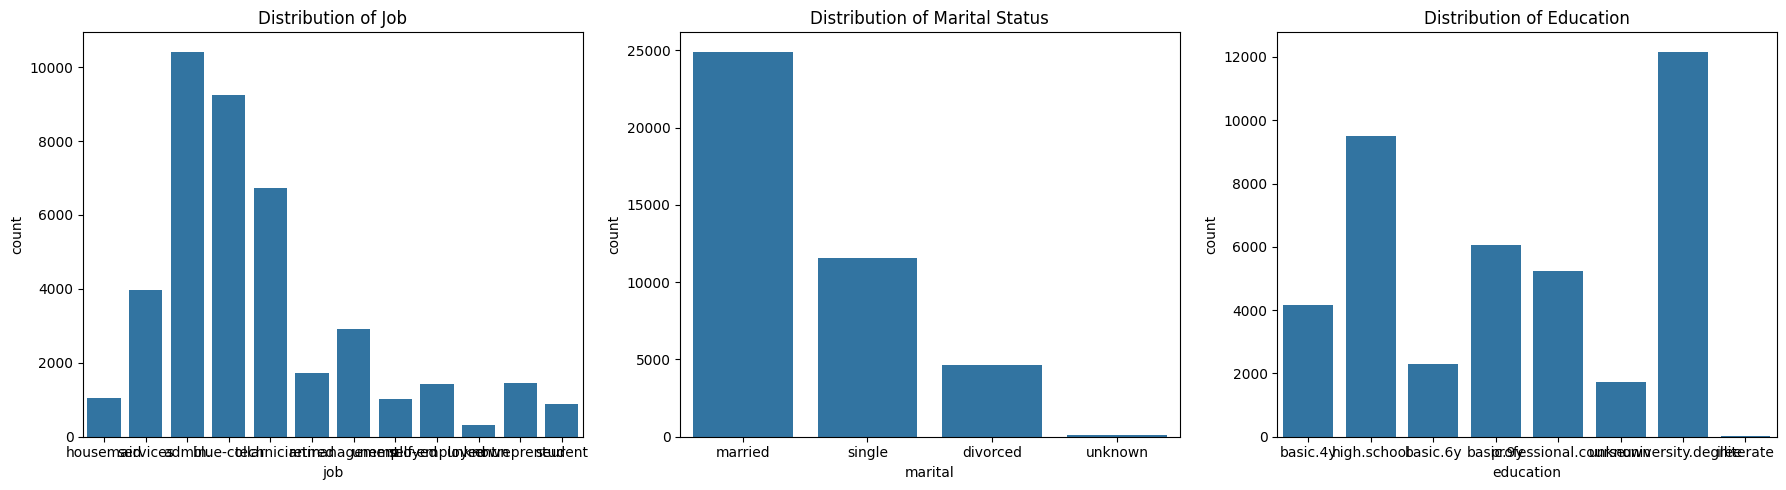

In [12]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=bank_client, x='job')
plt.title('Distribution of Job')

plt.subplot(1, 3, 2)
sns.countplot(data=bank_client, x='marital')
plt.title('Distribution of Marital Status')

plt.subplot(1, 3, 3)
sns.countplot(data=bank_client, x='education')
plt.title('Distribution of Education')

plt.tight_layout()
plt.show()

**Висновки з завдання 6 (детальні)**

1.  - Job: Більшість клієнтів банку працюють в сфері адміністрування, служби, технічних професіях та послуг.
    - Marital: Значна кількість клієнтів є одруженими, тоді як кількість одиноких та розведених клієнтів менша.
    - Education: Більшість клієнтів мають базову або середню освіту.

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

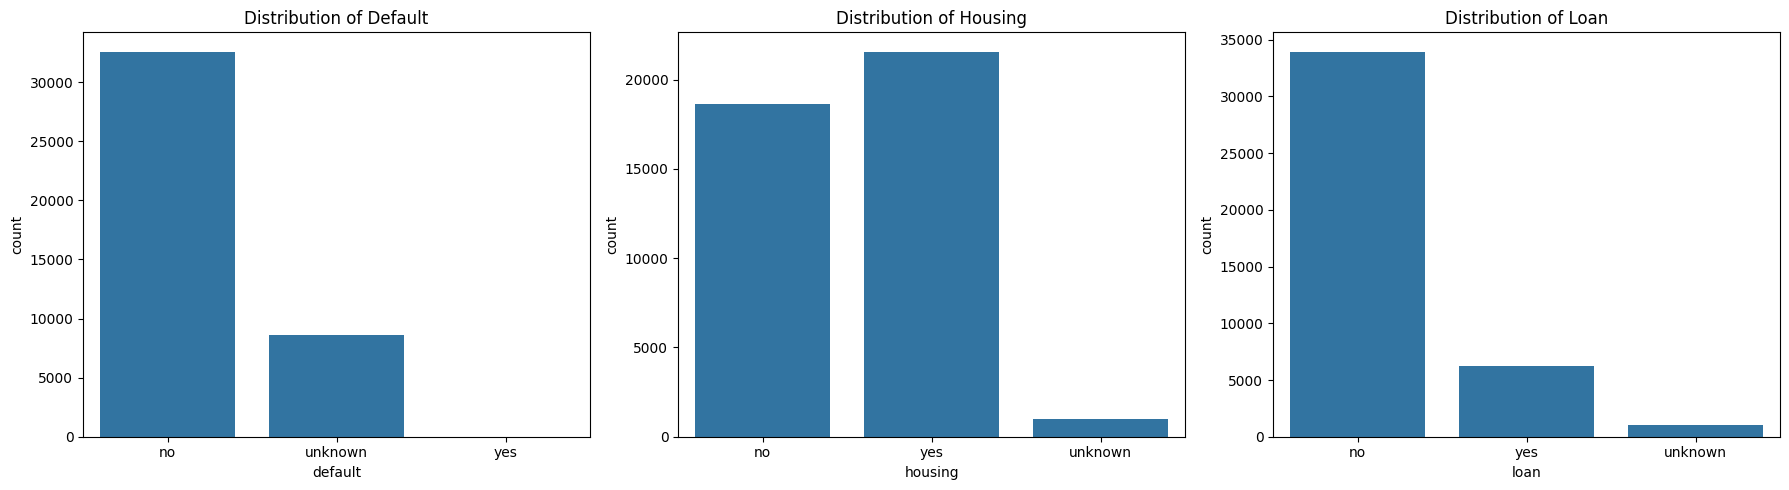

In [13]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=bank_client, x='default')
plt.title('Distribution of Default')

plt.subplot(1, 3, 2)
sns.countplot(data=bank_client, x='housing')
plt.title('Distribution of Housing')

plt.subplot(1, 3, 3)
sns.countplot(data=bank_client, x='loan')
plt.title('Distribution of Loan')

plt.tight_layout()
plt.show()

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [14]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
      # Leaves NaN as it is.
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df[col] = le.fit_transform(df[col])
      
    return df

In [79]:
bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing',  'loan'])

C:\Users\legio\AppData\Local\Temp\ipykernel_23544\431687371.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\legio\AppData\Local\Temp\ipykernel_23544\431687371.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\legio\AppData\Local\Temp\ipykernel_23544\431687371.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [16]:
def encode_age(dataframe: pd.DataFrame, age_col: str ) -> pd.DataFrame:
  """
  Function for encoding age column
    
  df: pd.DataFrame to encode
  age_col: age col to encode 
  """
  Q1 = dataframe[age_col].quantile(0.25)
  Q2 = dataframe[age_col].quantile(0.50)
  Q3 = dataframe[age_col].quantile(0.75)
    
  # Encode based on quartiles
  dataframe.loc[dataframe[age_col] <= Q1, age_col] = 0
  dataframe.loc[(dataframe[age_col] > Q1) & (dataframe[age_col] <= Q2), age_col] = 1
  dataframe.loc[(dataframe[age_col] > Q2) & (dataframe[age_col] <= Q3), age_col] = 2
  dataframe.loc[dataframe[age_col] > Q3, age_col] = 3
          
  return dataframe

In [29]:
bank_client = encode_age(bank_client, 'age')

**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних

Age before transformation:
count    41188.000000
mean         1.454259
std          1.126957
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: age, dtype: float64


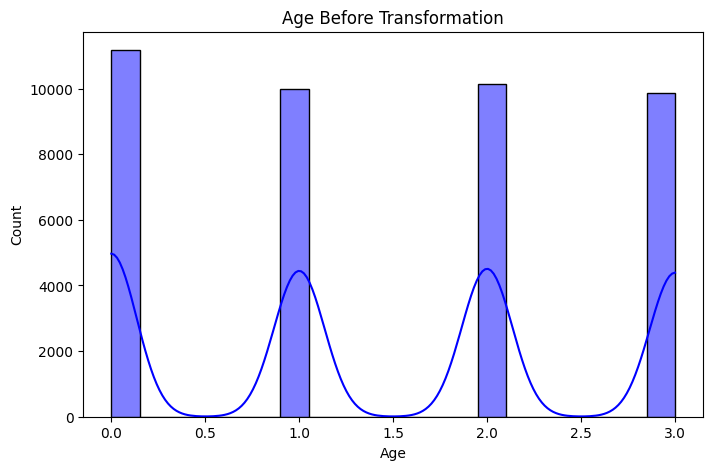


Age after transformation:
count    41188.000000
mean         1.454259
std          1.126957
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: age, dtype: float64


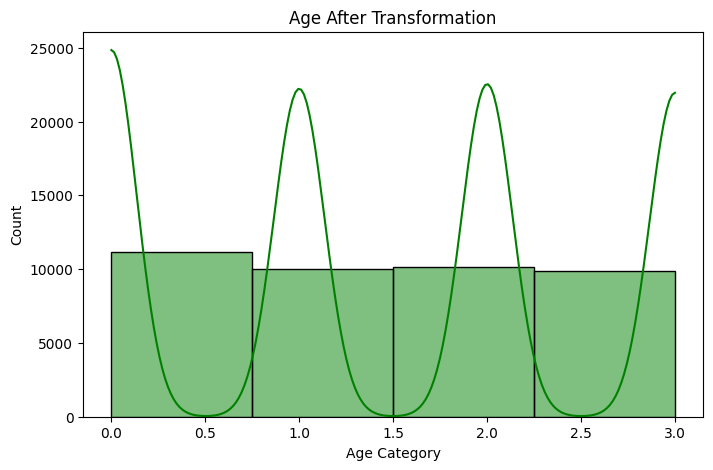

In [30]:
print("Age before transformation:")
print(bank_client['age'].describe())

plt.figure(figsize=(8, 5))
sns.histplot(bank_client['age'], bins=20, kde=True, color='blue')
plt.title('Age Before Transformation')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

bank_client = encode_age(bank_client, 'age')

print("\nAge after transformation:")
print(bank_client['age'].describe())

plt.figure(figsize=(8, 5))
sns.histplot(bank_client['age'], bins=4, kde=True, color='green')
plt.title('Age After Transformation')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [77]:
bank_relat = bank_client[['default', 'housing', 'loan']]

print("DataFrame:")
print(bank_relat.head())

print("\nПеревірка на NaN :")
print(bank_relat.isnull().sum())

DataFrame:
   default  housing  loan
0        0        0     0
1        1        0     0
2        0        2     0
3        0        0     0
4        0        0     2

Перевірка на NaN :
default    0
housing    0
loan       0
dtype: int64


**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [44]:
print("Унікальні значення для 'contact':", data['contact'].unique())
print("\nУнікальні значення для 'month':", data['month'].unique())
print("\nУнікальні значення для 'day_of_week':", data['day_of_week'].unique())

Унікальні значення для 'contact': ['telephone' 'cellular']

Унікальні значення для 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Унікальні значення для 'day_of_week': ['mon' 'tue' 'wed' 'thu' 'fri']


# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



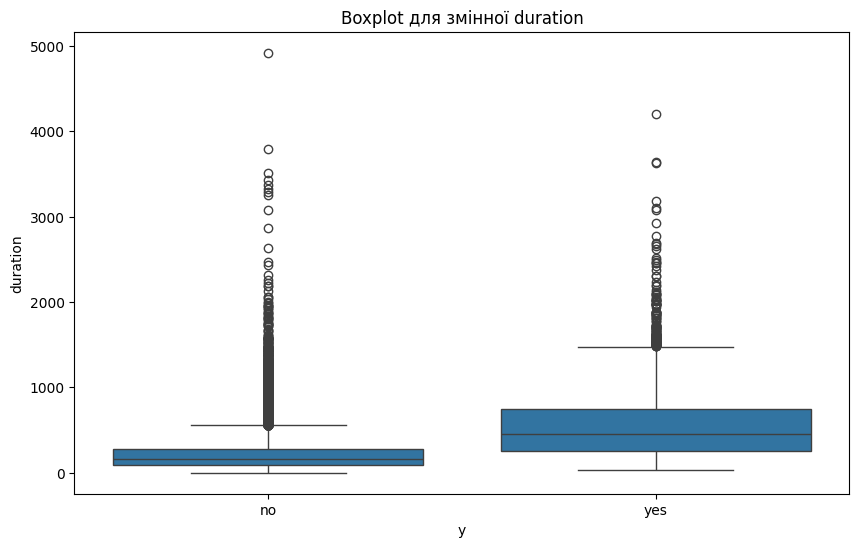

<Figure size 1000x600 with 0 Axes>

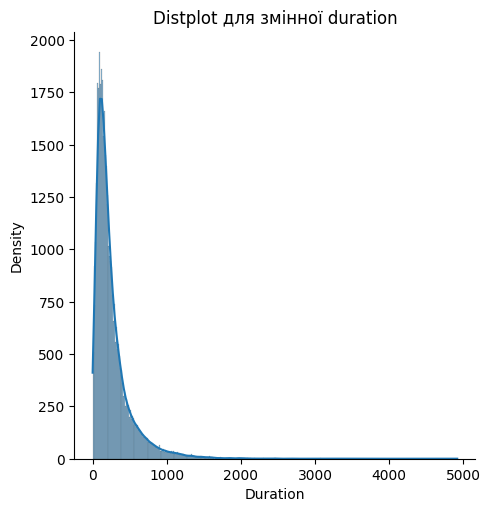

Коефіцієнт ексцесу для змінної duration: 20.245334438614844


In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='duration', data=data)
plt.title('Boxplot для змінної duration')

plt.figure(figsize=(10, 6))
sns.displot(data['duration'], kde=True)
plt.title('Distplot для змінної duration')
plt.xlabel('Duration')
plt.ylabel('Density')

plt.show()

kurtosis_val = kurtosis(data['duration'])
print(f"Коефіцієнт ексцесу для змінної duration: {kurtosis_val}")

**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [62]:
data = encode_categorical_columns(data, ['contact', 'month', 'day_of_week'])

In [63]:
print("Унікальні значення для 'contact' після кодування:", data['contact'].unique())
print("\nУнікальні значення для 'month' після кодування:", data['month'].unique())
print("\nУнікальні значення для 'day_of_week' після кодування:", data['day_of_week'].unique())

Унікальні значення для 'contact' після кодування: [1 0]

Унікальні значення для 'month' після кодування: [6 4 3 1 8 7 2 5 0 9]

Унікальні значення для 'day_of_week' після кодування: [1 3 4 2 0]


**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [94]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str ) -> pd.DataFrame:
  """
  Function for encoding duration column
    
  df: pd.DataFrame to encode
  duration_col: duration col to encode 
  """
  quartiles = dataframe[duration_col].quantile([0, 0.25, 0.5, 0.75, 1.0])
  
  dataframe['duration'] = pd.qcut(dataframe[duration_col], q=4, labels=False, duplicates='drop')
     
  return dataframe

In [99]:
bank_relat = encode_duration(data, 'duration')

## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [103]:
social_economic_cols = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
bank_socec = data[social_economic_cols].copy()

print(bank_socec.head())

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y
0           1.1          93.994          -36.4      4.857       5191.0  no
1           1.1          93.994          -36.4      4.857       5191.0  no
2           1.1          93.994          -36.4      4.857       5191.0  no
3           1.1          93.994          -36.4      4.857       5191.0  no
4           1.1          93.994          -36.4      4.857       5191.0  no


**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [101]:
other_cols = ['campaign', 'pdays', 'previous', 'poutcome']

bank_other = data[other_cols].copy()

print(bank_other.head())

   campaign  pdays  previous     poutcome
0         1    999         0  nonexistent
1         1    999         0  nonexistent
2         1    999         0  nonexistent
3         1    999         0  nonexistent
4         1    999         0  nonexistent


**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [104]:
print("Унікальні значення для 'poutcome':", data['poutcome'].unique())

data['poutcome'] = data['poutcome'].replace({'nonexistent': 0, 'failure': 1, 'success': 2})

print("Унікальні значення для 'poutcome' після трансформації:", data['poutcome'].unique())

Унікальні значення для 'poutcome': ['nonexistent' 'failure' 'success']
Унікальні значення для 'poutcome' після трансформації: [0 1 2]


## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [114]:
frames = [bank_other, bank_socec, bank_relat]
bank_final = pd.concat(frames, axis=1)

# Перевірка результату
print(bank_final.columns)

Index(['campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_encoded'],
      dtype='object')


**Завдання 19** Провести ділення вибірки

In [115]:
def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    """
    Function that prepares data for training. Splits the data into train and test datasets and get k-folds for cross-validation

    X: pd.DataFrame with features
    target: target pd.Series
    test_size: the size of test datasets
    n_splits: number of cross-validation splits
    random_state: random state to reproduce the same split

    returns: X_train, X_test, y_train, y_test, k_fold
    """

    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold

In [117]:
target = bank_final['y']
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final, target, 0.2, 10, 101)

In [140]:
def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):
  
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

  return X_train, X_test

In [ ]:
X_train, X_test = scale_the_data(X_train, X_test)

## Логістична Регресія

In [ ]:
logmodel = LogisticRegression() 
logmodel.fit(#your code)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

## k-NN

In [ ]:
#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(#your code)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

## Логістична Регресія

In [ ]:
models = pd.DataFrame({
                'Models': #code,
                'Score':  #code]})

models.sort_values(by='Score', ascending=False)

**Висновки по моделям (детальні)**

1.   
2.   
3. ...